In [2]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\asraf\Downloads\Project MAA\2New-Main Data Sheet-2023-Asrafi.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Display all available sheet names
print("Available Sheets:", xls.sheet_names)

Available Sheets: ['32207', '32224', '32254', '32210', '32277']


In [3]:
# Load and merge all sheets into one DataFrame
all_data = pd.concat([xls.parse(sheet) for sheet in xls.sheet_names], ignore_index=True)

# Display the shape and first few rows
print("Combined Data Shape:", all_data.shape)
print(all_data.head())

Combined Data Shape: (300, 30)
   Sale Date  Zip code Last sold PRICE  Price/sq  Size(sqft)  Lot size(sqrt)  \
0 2023-01-09     32207         1194000       215        3296         11326.0   
1 2023-01-20     32207        $435,000       284        1468         16068.0   
2 2023-01-14     32207         1538000       350        3988         12196.8   
3 2023-01-03     32207         3887300       483        8266        101494.8   
4 2023-01-27     32207          469964       271        1739         11761.2   

   Floors  Bed Rooms  Bath  Pool  ...  Med Age  Commute Time  Elementary  \
0       2          4   3.5     2  ...     39.2          19.7         5.0   
1       1          3   1.0     0  ...     39.2          19.7         6.0   
2       2          5   4.5     2  ...     39.2          19.7         5.0   
3       2          5   6.5     0  ...     39.2          19.7         6.5   
4       2          3   2.5     0  ...     39.2          19.7         4.0   

   Middle School  Highschool  H

In [4]:
# Remove extra spaces from column names
all_data.columns = all_data.columns.str.strip()

# Display updated column names
print("Updated Column Names:", all_data.columns)

Updated Column Names: Index(['Sale Date', 'Zip code', 'Last sold PRICE', 'Price/sq', 'Size(sqft)',
       'Lot size(sqrt)', 'Floors', 'Bed Rooms', 'Bath', 'Pool', 'Year Built',
       'Garage', 'HOA', 'Prop tax', 'Quiet', 'Flood Risk', 'Majority race',
       'Majority Gender', 'Med Income', '% CollegeUp', 'Med Age',
       'Commute Time', 'Elementary', 'Middle School', 'Highschool',
       'Higher ed', 'Year to election', 'Party in House', 'Party In Senate',
       'Crime Rate/1000 resident'],
      dtype='object')


In [5]:
# Convert 'Last sold PRICE' to numeric (remove $, , and spaces)
all_data["Last sold PRICE"] = all_data["Last sold PRICE"].replace(r'[^\d.]', '', regex=True).astype(float)

# Rename it to a standard name for consistency
all_data.rename(columns={"Last sold PRICE": "Last Sold Price"}, inplace=True)

# Display first few rows
print(all_data.head())

   Sale Date  Zip code  Last Sold Price  Price/sq  Size(sqft)  Lot size(sqrt)  \
0 2023-01-09     32207        1194000.0       215        3296         11326.0   
1 2023-01-20     32207         435000.0       284        1468         16068.0   
2 2023-01-14     32207        1538000.0       350        3988         12196.8   
3 2023-01-03     32207        3887300.0       483        8266        101494.8   
4 2023-01-27     32207         469964.0       271        1739         11761.2   

   Floors  Bed Rooms  Bath  Pool  ...  Med Age  Commute Time  Elementary  \
0       2          4   3.5     2  ...     39.2          19.7         5.0   
1       1          3   1.0     0  ...     39.2          19.7         6.0   
2       2          5   4.5     2  ...     39.2          19.7         5.0   
3       2          5   6.5     0  ...     39.2          19.7         6.5   
4       2          3   2.5     0  ...     39.2          19.7         4.0   

   Middle School  Highschool  Higher ed  Year to electio

In [6]:
print("Missing values in each column:\n", all_data.isnull().sum())

Missing values in each column:
 Sale Date                     0
Zip code                      0
Last Sold Price               0
Price/sq                      0
Size(sqft)                    0
Lot size(sqrt)                0
Floors                        0
Bed Rooms                     0
Bath                          0
Pool                          0
Year Built                    0
Garage                        0
HOA                           0
Prop tax                      0
Quiet                         0
Flood Risk                    0
Majority race                 0
Majority Gender               0
Med Income                    0
% CollegeUp                   0
Med Age                       0
Commute Time                  0
Elementary                    0
Middle School                 0
Highschool                    0
Higher ed                   180
Year to election              0
Party in House                0
Party In Senate               0
Crime Rate/1000 resident      0
dtype: i

In [7]:
# Fill missing values in "Higher ed" with column mean
all_data["Higher ed"] = all_data["Higher ed"].fillna(all_data["Higher ed"].mean())

# Confirm missing values are fixed
print("Missing values after filling:\n", all_data.isnull().sum())

Missing values after filling:
 Sale Date                   0
Zip code                    0
Last Sold Price             0
Price/sq                    0
Size(sqft)                  0
Lot size(sqrt)              0
Floors                      0
Bed Rooms                   0
Bath                        0
Pool                        0
Year Built                  0
Garage                      0
HOA                         0
Prop tax                    0
Quiet                       0
Flood Risk                  0
Majority race               0
Majority Gender             0
Med Income                  0
% CollegeUp                 0
Med Age                     0
Commute Time                0
Elementary                  0
Middle School               0
Highschool                  0
Higher ed                   0
Year to election            0
Party in House              0
Party In Senate             0
Crime Rate/1000 resident    0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (excluding target variable)
numeric_cols = all_data.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove("Last Sold Price")  # Exclude the target variable

# Display selected columns
print("Numeric columns to standardize:", numeric_cols)

Numeric columns to standardize: ['Zip code', 'Price/sq', 'Size(sqft)', 'Lot size(sqrt)', 'Floors', 'Bed Rooms', 'Bath', 'Pool', 'Year Built', 'Garage', 'HOA', 'Prop tax', 'Quiet', 'Flood Risk', 'Majority race', 'Med Income', '% CollegeUp', 'Med Age', 'Commute Time', 'Elementary', 'Middle School', 'Highschool', 'Higher ed', 'Year to election', 'Party in House', 'Party In Senate', 'Crime Rate/1000 resident']


In [9]:
# Create a scaler object
scaler = StandardScaler()

# Standardize only numeric columns
all_data[numeric_cols] = scaler.fit_transform(all_data[numeric_cols])

# Display first few rows after standardization
print(all_data.head())

   Sale Date  Zip code  Last Sold Price  Price/sq  Size(sqft)  Lot size(sqrt)  \
0 2023-01-09 -1.013675        1194000.0  0.160084    1.780969        0.144949   
1 2023-01-20 -1.013675         435000.0  0.932335   -0.444253        0.798081   
2 2023-01-14 -1.013675        1538000.0  1.671011    2.623340        0.264887   
3 2023-01-03 -1.013675        3887300.0  3.159554    7.830944       12.564214   
4 2023-01-27 -1.013675         469964.0  0.786839   -0.114365        0.204890   

     Floors  Bed Rooms      Bath      Pool  ...  Med Age  Commute Time  \
0  2.708013   1.030619  1.757857  2.977322  ...  1.72795     -1.665217   
1 -0.369274  -0.069686 -1.315320 -0.498151  ...  1.72795     -1.665217   
2  2.708013   2.130923  2.987128  2.977322  ...  1.72795     -1.665217   
3  2.708013   2.130923  5.445670 -0.498151  ...  1.72795     -1.665217   
4  2.708013  -0.069686  0.528586 -0.498151  ...  1.72795     -1.665217   

   Elementary  Middle School  Highschool  Higher ed  Year to electio

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = all_data[numeric_cols]  # Use all standardized features
y = all_data["Last Sold Price"]  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of train/test sets
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (240, 27) (240,)
Testing Data Shape: (60, 27) (60,)


In [11]:
from sklearn.model_selection import KFold

# Define 10-Fold Outer Cross-Validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Define 5-Fold Inner Cross-Validation for GridSearch
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("✅ Nested Cross-Validation Setup Complete!")

✅ Nested Cross-Validation Setup Complete!


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, ElasticNet

# Define hyperparameter grid for Ridge
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Define hyperparameter grid for Elastic Net
param_grid_elastic = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.1, 0.5, 0.9]
}

# Perform GridSearchCV with Nested Cross-Validation
ridge_cv = GridSearchCV(Ridge(), param_grid_ridge, cv=inner_cv, scoring="r2")
elastic_cv = GridSearchCV(ElasticNet(), param_grid_elastic, cv=inner_cv, scoring="r2")

# Fit models
ridge_cv.fit(X_train, y_train)
elastic_cv.fit(X_train, y_train)

# Print best parameters
print("\n✅ Best Hyperparameters:")
print("Ridge Best Alpha:", ridge_cv.best_params_["alpha"])
print("Elastic Net Best Alpha:", elastic_cv.best_params_["alpha"], " | Best L1 Ratio:", elastic_cv.best_params_["l1_ratio"])

C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.987e+11, tolerance: 2.818e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+12, tolerance: 3.718e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


✅ Best Hyperparameters:
Ridge Best Alpha: 10
Elastic Net Best Alpha: 0.1  | Best L1 Ratio: 0.9


C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.041e+10, tolerance: 3.914e+09
  model = cd_fast.enet_coordinate_descent(


In [13]:
# Train Elastic Net model with increased iterations
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000)  # Increase iterations
elastic_model.fit(X_train, y_train)

# Predictions
y_pred_elastic = elastic_model.predict(X_test)

# Evaluate model performance
elastic_mse = mean_squared_error(y_test, y_pred_elastic)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, y_pred_elastic)

print("\n📌 Elastic Net Regression Results:")
print("MSE:", elastic_mse, "| RMSE:", elastic_rmse, "| R²:", elastic_r2)


📌 Elastic Net Regression Results:
MSE: 14606790820.381767 | RMSE: 120858.55708381499 | R²: 0.8421959725581684


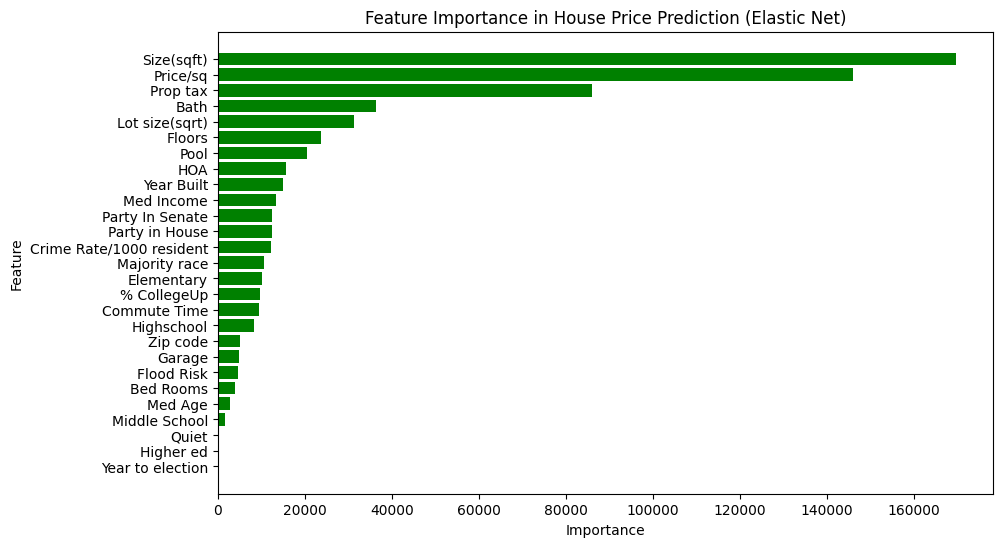

                     Feature    Coefficient     Importance
2                 Size(sqft)  169671.881267  169671.881267
1                   Price/sq  146083.073925  146083.073925
11                  Prop tax   86093.869836   86093.869836
6                       Bath   36284.655528   36284.655528
3             Lot size(sqrt)   31378.430883   31378.430883
4                     Floors   23772.631959   23772.631959
7                       Pool   20469.546934   20469.546934
10                       HOA   15747.295976   15747.295976
8                 Year Built  -14949.606046   14949.606046
15                Med Income  -13358.496439   13358.496439
25           Party In Senate   12388.421226   12388.421226
24            Party in House   12388.324639   12388.324639
26  Crime Rate/1000 resident   12146.865761   12146.865761
14             Majority race   10522.181246   10522.181246
19                Elementary   10127.681714   10127.681714
16               % CollegeUp   -9742.812179    9742.8121

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importance from Elastic Net model
feature_importance = np.abs(elastic_model.coef_)

# Create a DataFrame for feature names and importance values
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance, 'Coefficient': elastic_model.coef_})

# Sort by importance (highest to lowest)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="green")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in House Price Prediction (Elastic Net)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.show()

# Print the coefficients for each feature alongside their importance
print(importance_df[['Feature', 'Coefficient', 'Importance']])

In [19]:
# Train Ridge Regression with best alpha
best_ridge = Ridge(alpha=10)
best_ridge.fit(X_train, y_train)

# Train Elastic Net with best alpha & l1_ratio
best_elastic = ElasticNet(alpha=0.1, l1_ratio=0.9)
best_elastic.fit(X_train, y_train)

# Make Predictions
y_pred_ridge = best_ridge.predict(X_test)
y_pred_elastic = best_elastic.predict(X_test)

# Calculate MSE, RMSE, and R² for Ridge Regression
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Calculate MSE, RMSE, and R² for Elastic Net Regression
elastic_mse = mean_squared_error(y_test, y_pred_elastic)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, y_pred_elastic)

# Now compare both models
print("\n📌 Model Comparison:")
print(f"Ridge Regression - MSE: {ridge_mse:.2f}, RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.4f}")
print(f"Elastic Net - MSE: {elastic_mse:.2f}, RMSE: {elastic_rmse:.2f}, R²: {elastic_r2:.4f}")


📌 Model Comparison:
Ridge Regression - MSE: 13966010902.61, RMSE: 118177.88, R²: 0.8491
Elastic Net - MSE: 14606791321.66, RMSE: 120858.56, R²: 0.8422


C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.041e+10, tolerance: 3.914e+09
  model = cd_fast.enet_coordinate_descent(


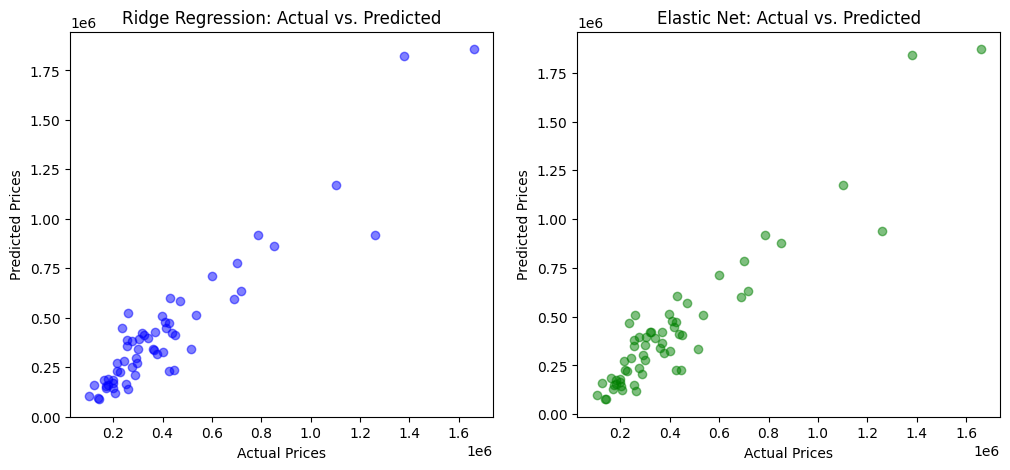

In [20]:
plt.figure(figsize=(12, 5))

# Actual vs Predicted: Ridge
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression: Actual vs. Predicted")

# Actual vs Predicted: Elastic Net
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elastic, alpha=0.5, color="green")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Elastic Net: Actual vs. Predicted")

plt.show()

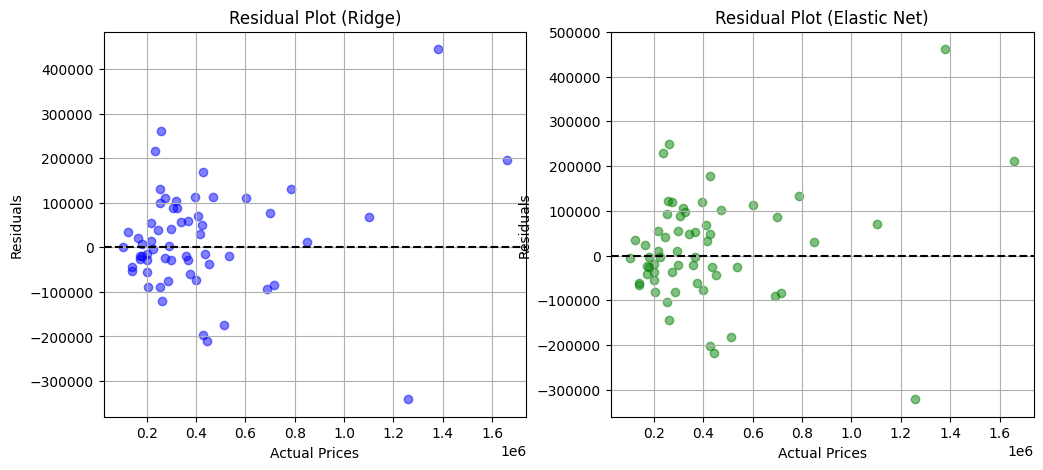

In [21]:
plt.figure(figsize=(12, 5))

# Residual Plot for Ridge
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge - y_test, alpha=0.5, color="blue")
plt.axhline(y=0, color='black', linestyle='--')  # Adding horizontal line at zero
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge)")
plt.grid(True)

# Residual Plot for Elastic Net
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elastic - y_test, alpha=0.5, color="green")
plt.axhline(y=0, color='black', linestyle='--')  # Adding horizontal line at zero
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Elastic Net)")
plt.grid(True)

plt.show()